## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
if X.isna().sum().sum() == 0:
    print('no')
else:
    print('yes')

no


In [4]:
pd.DataFrame(X.dtypes)[0].value_counts()

float64    13
Name: 0, dtype: int64

В наборе нет категориальных переменных.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X[['alcohol', 'magnesium']], y, test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('NN', 'Train', 'Test', sep='\t')
lst = [1, 3, 5, 10, 15, 25]
for i in lst:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    print(i, float('{:.2f}'.format(accuracy_score(y_train, clf.predict(X_train)))), float('{:.2f}'.format(accuracy_score(y_test, clf.predict(X_test)))), sep='\t')


NN	Train	Test
1	0.99	0.65
3	0.82	0.72
5	0.81	0.72
10	0.75	0.74
15	0.74	0.72
25	0.65	0.8


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [7]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

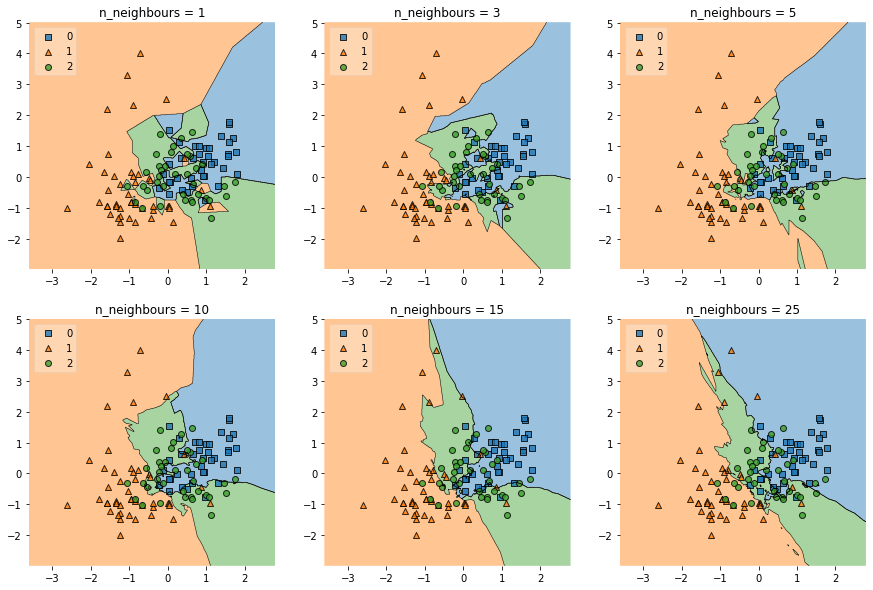

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15,10))
clfs = [KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=5), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=15), KNeighborsClassifier(n_neighbors=25)]
labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for i in (range(6)):
    clfs[i].fit(X_train, y_train)
    ax = plt.subplot(gs[i//3, i%3])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clfs[i], legend=2)    
    plt.title(labels[i])

plt.show()

Мне кажется, что оптимальное количество соседей в данном случае - 3, потому что фигуры довольно целостно выглядят, но при этом довольно мало меток были оценены ложно.

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

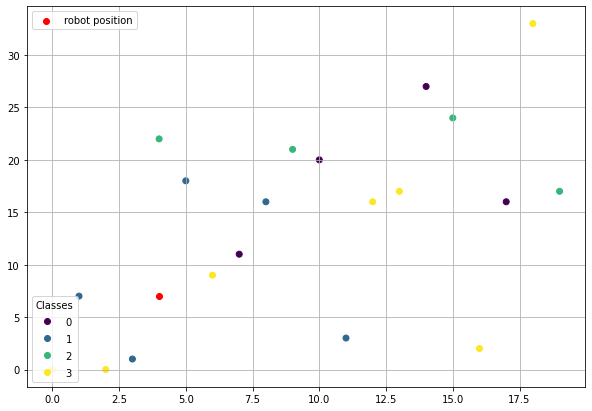

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [np.array(initial_position)]# <ВАШ КОД ЗДЕСЬ>
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)# <ВАШ КОД ЗДЕСЬ>
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        current = self.trajectory[len(self.trajectory)-1] #current position
        if np.random.binomial(1, 0.2, 1)[0] == 1:
            self.trajectory.append(current+self.mapping[0])
        else:
            cl = self.knn.predict ([current]) #closest class
            self.trajectory.append(current+self.mapping[cl[0]])
        # <ВАШ КОД ЗДЕСЬ>


**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [13]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)# <ВАШ КОД ЗДЕСЬ>
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

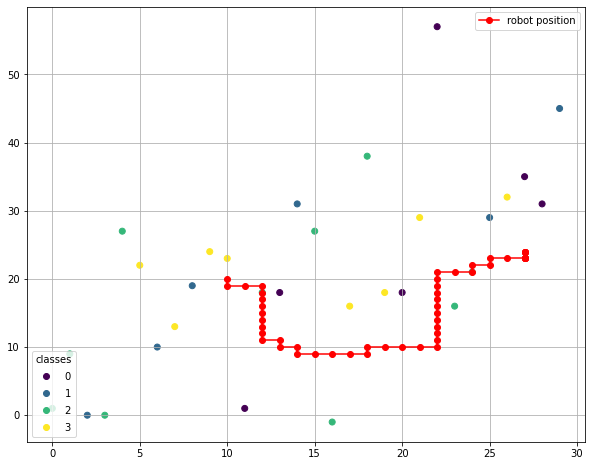

In [14]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

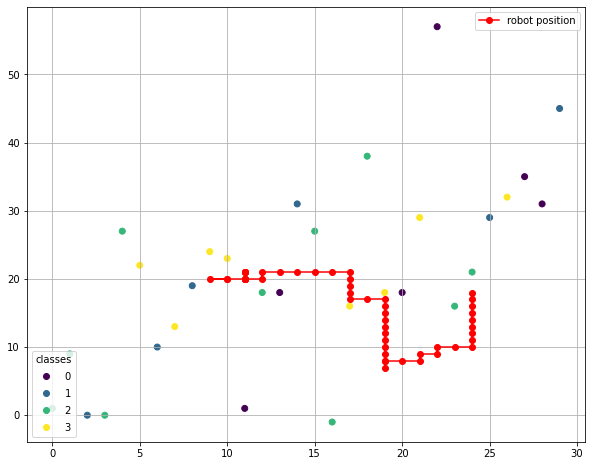

In [15]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

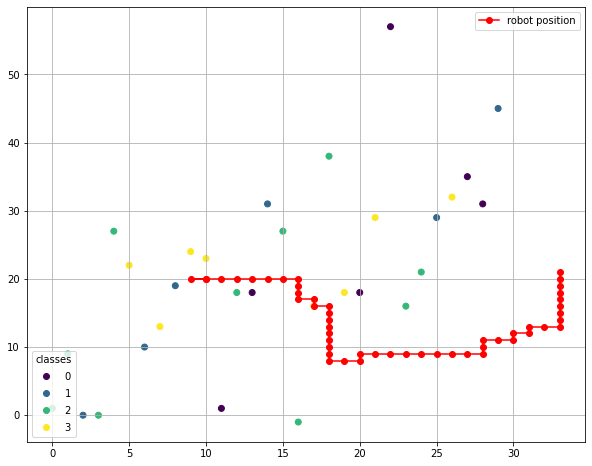

In [16]:
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

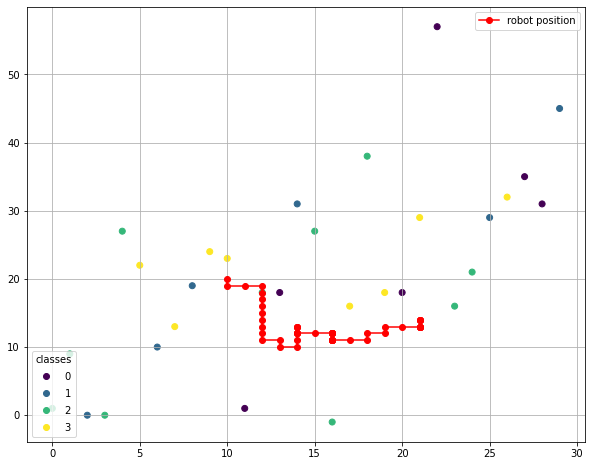

In [17]:
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

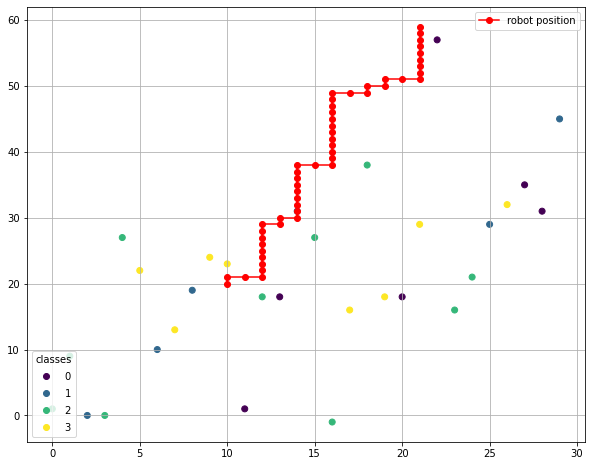

In [18]:
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

Сложно выявить закономерность во влиянии числа соседей на траекторию, но если брать число соседей равное количеству меток, то точка будет передвигаться только вверх либо вправо.

Если бы классы назначались меткам не случайно, а осмысленно, исход мог бы быть другим, но предугадать его сложно, так как неизвестен принцип, по которому меткам назначали бы классы.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [19]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [20]:
if data.isna().sum().sum() == 0:
    print('no')
else:
    print('yes')

no


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [21]:
data = data.drop('Unnamed: 0', 1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

data_real = data[data.columns[~(data.dtypes == "object").values]]
data_cat = data[data.columns[(data.dtypes == "object").values]]
X = data.drop('price', 1)
y = pd.DataFrame(data['price'])
cor = data_real.corr()['price'].sort_values(ascending=False)
cor

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

carat и x коррелируют больше всего

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [23]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [24]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train_real = X_train[['carat', 'depth', 'table', 'x', 'y', 'z']]
X_test_real = X_test[['carat', 'depth', 'table', 'x', 'y', 'z']]
X_train_cat = X_train.drop('carat', 1).drop('depth', 1).drop('table', 1).drop('x', 1).drop('y', 1).drop('z', 1)
X_test_cat = X_test.drop('carat', 1).drop('depth', 1).drop('table', 1).drop('x', 1).drop('y', 1).drop('z', 1)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_real)
X_train_real = scaler.transform(X_train_real)
X_test_real = scaler.transform(X_test_real)

In [26]:
X_train = pd.concat([pd.DataFrame(X_train_real), X_train_cat.set_index(np.arange(37758))], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_real), X_test_cat.set_index(np.arange(16182))], axis=1)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lr = LinearRegression().fit(X_train, y_train)
print("Train:", mean_squared_error(y_train, lr.predict(X_train)))
print("Test:", mean_squared_error(y_test, lr.predict(X_test)))
print(lr.coef_)

Train: 1270791.8536412274
Test: 1291193.898986285
[[ 5.30771734e+03 -9.09093019e+01 -6.30227446e+01 -1.08975649e+03
   3.46573300e-01 -4.02044976e+01  6.17961140e+02  8.58752492e+02
   7.88367010e+02  7.50316849e+02 -2.27354609e+02 -2.78937748e+02
  -5.03627215e+02 -9.77523471e+02 -1.49620096e+03 -2.37683200e+03
   5.36970660e+03  3.71724983e+03  2.75750964e+03  4.63327571e+03
   4.32167393e+03  5.09590748e+03  5.02046194e+03]]


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [28]:
coefs = pd.DataFrame({'features':np.array(X.columns), 'coefs':np.array(lr.coef_[0])}).head(6)
coefs['abs'] = coefs['coefs'].apply(lambda x: x if x>=0 else -x)
coefs.sort_values(by=['abs'], ascending=False)

,features,coefs,abs
0,carat,5307.717343,5307.717343
3,x,-1089.756486,1089.756486
1,depth,-90.909302,90.909302
2,table,-63.022745,63.022745
5,z,-40.204498,40.204498
4,y,0.346573,0.346573


коэффициенты carat и x значительно превышают остальные по модулю.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [29]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
print(lasso.coef_, '\n')

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 4755.43959653  -156.60286647  -111.26494033  -695.19027399
    -0.           -12.06475992    -0.           158.19694222
    76.67161428    76.61854119     0.            -0.
  -130.38536846  -594.11677865 -1015.50617754 -1767.32812537
  1274.99280633     0.          -795.82916358   828.05110169
   586.79984558  1193.6722317   1182.6618356 ] 

[[ 5.25890308e+03 -9.46706428e+01 -6.61413636e+01 -1.05545447e+03
   1.03788492e+00 -3.93451398e+01  6.35983587e+02  8.81331589e+02
   8.08955790e+02  7.75441594e+02 -2.15758300e+02 -2.65775904e+02
  -4.85462958e+02 -9.60233575e+02 -1.47038844e+03 -2.33878997e+03
   4.77036725e+03  3.16426413e+03  2.21264332e+03  4.07111952e+03
   3.76516766e+03  4.51939490e+03  4.45129777e+03]]


В случае с lasso веса сильно увеличились по модулю, а для ridge веса практически не изменились. Проблема мультиколлинеарности незначительно проявлялась в изначальной регрессии.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

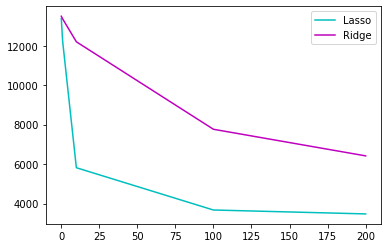

In [30]:
alphas = [0.1, 1, 10, 100, 200]
l_norm = []
r_norm = []
for i in alphas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    l_norm.append(np.linalg.norm(lasso.coef_))
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    r_norm.append(np.linalg.norm(ridge.coef_))
plt.plot(alphas, l_norm, color = 'c', label = 'Lasso')
plt.plot(alphas, r_norm, color = 'm', label = 'Ridge')
plt.legend()
plt.show()

Lasso агрессивнее уменьшает веса, возможно, поэтому ее считают более эффективной и чаще используют.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [31]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]
reg = LassoCV(alphas=alphas, cv=6, tol=0.01).fit(X_train, y_train.values.ravel())

er = pd.DataFrame({'alpha':np.array(reg.alphas_), 'mean error':np.array(pd.DataFrame(reg.mse_path_).mean(axis=1))})
er.sort_values(by=['mean error'])

,alpha,mean error
3,1.0,1.282808e+06
4,0.1,1.289084e+06
2,10.0,1.519013e+06
1,100.0,2.231212e+06
0,200.0,2.438083e+06


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [32]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

coefs = pd.DataFrame({'features':np.array(X.columns), 'coefs':np.array(lr.coef_[0])}).head(6)
coefs['abs'] = coefs['coefs'].apply(lambda x: x if x>=0 else -x)
coefs.sort_values(by=['abs'], ascending=False)

,features,coefs,abs
0,carat,5307.717343,5307.717343
3,x,-1089.756486,1089.756486
1,depth,-90.909302,90.909302
2,table,-63.022745,63.022745
5,z,-40.204498,40.204498
4,y,0.346573,0.346573


carat и x оказались наиболее информативными, возможно, потому, что они больше всего коррелируют с целевой переменной, что можно было увидеть в матрице корреляций.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [33]:
print("Linear regression on train:  ", mean_squared_error(y_train, lr.predict(X_train)))
print("Lasso on train:              ", mean_squared_error(y_train, lasso.predict(X_train)), "\n")

print("Linear regression on test:   ", mean_squared_error(y_test, lr.predict(X_test)))
print("Lasso on test:               ", mean_squared_error(y_test, lasso.predict(X_test)))

Linear regression on train:   1270791.8536412274
Lasso on train:               1275440.9041688691 

Linear regression on test:    1291193.898986285
Lasso on test:                1292314.3025187731


Среднеквадратичные ошибки для двух моделей практически не отличаются, но все же можно сказать, что, наверное, лучше было бы использовать lasso-регрессию для регуляции мультиколлинеарности. Так как это предусмотренно в lasso-регрессии, можно сказать, что она лучше.